In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout
from matplotlib import pyplot
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

C:\Users\amrit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\amrit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\amrit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\amrit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

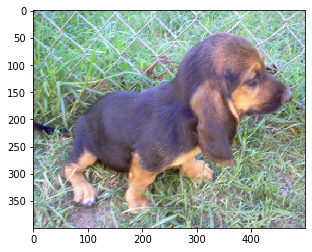

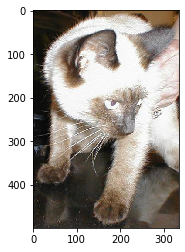

In [3]:
folder = r'C:\Users\amrit\Desktop\Python\Datasets\dataset\test_set'

for i in range(4001 , 4010):
    filename = folder + '\\' + 'dogs' + '\\' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)

pyplot.show()


for i in range(4001 , 4010):
    filename = folder + '\\' + 'cats' + '\\' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)

pyplot.show()

In [4]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it = datagen.flow_from_directory(r'C:\Users\amrit\Desktop\Python\Datasets\dataset\test_set',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(r'C:\Users\amrit\Desktop\Python\Datasets\dataset\training_set',
    class_mode='binary', batch_size=64, target_size=(200, 200))


Found 2000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [6]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(200,200,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=20)

model.summary()



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
32/32 [==============================] - 191s 6s/step - loss: 0.7156 - acc: 0.4975 - val_loss: 0.6870 - val_acc: 0.5008
Epoch 2/20
32/32 [==============================] - 201s 6s/step - loss: 0.6919 - acc: 0.5400 - val_loss: 0.6883 - val_acc: 0.5170
Epoch 3/20
32/32 [==============================] - 189s 6s/step - loss: 0.6809 - acc: 0.5580 - val_loss: 0.6668 - val_acc: 0.6170
Epoch 4/20
32/32 [==============================] - 187s 6s/step - loss: 0.6673 - acc: 0.6000 - val_loss: 0.6542 - val_acc: 0.6158
Epoch 5/20
32/32 [==============================] - 193s 6s/step - loss: 0.6319 - acc: 0.6400 - val_loss: 0.6307 - val_acc: 0.6500
Epoch 6/20
32/32 [==============================] - 190s 6s/step - loss: 0.6096 - acc: 0.6560 - val_loss: 0.6365 - val_acc: 0.6308
Ep

In [1]:
pred = model.predict(test_it)


NameError: name 'model' is not defined

In [7]:
model.save("model.h5")
